#**Classical Mechanics Simulations**

This notebook contains simulations of classical systems such as a simple pendulum, double pendulum, and planetary motion. These simulations are designed to illustrate key concepts in mechanics and provide a visual understanding of the dynamics of these systems.

In [40]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

1. **Simple Pendulum Simulation**

   A simple pendulum consists of a mass \( m \) attached to a string of length \( L \), swinging under the influence of gravity.

   **Parameters and Equations of Motion**

   The simple pendulum's motion is governed by the equation:

   \[ \theta''(t) + \frac{g}{L} \sin(\theta(t)) = 0 \]

   where:

   - \( \theta \) is the angle
   - \( g \) is the acceleration due to gravity
   - \( L \) is the length of the pendulum

Equations of Motion: The differential equation describes the angular displacement \( \theta \) and angular velocity \( \omega \) of the pendulum over time.

Numerical Solution: `scipy.integrate.solve_ivp` is used to solve the differential equation numerically.

Plotting: The angular displacement and velocity are plotted against time to visualize the pendulum's motion.


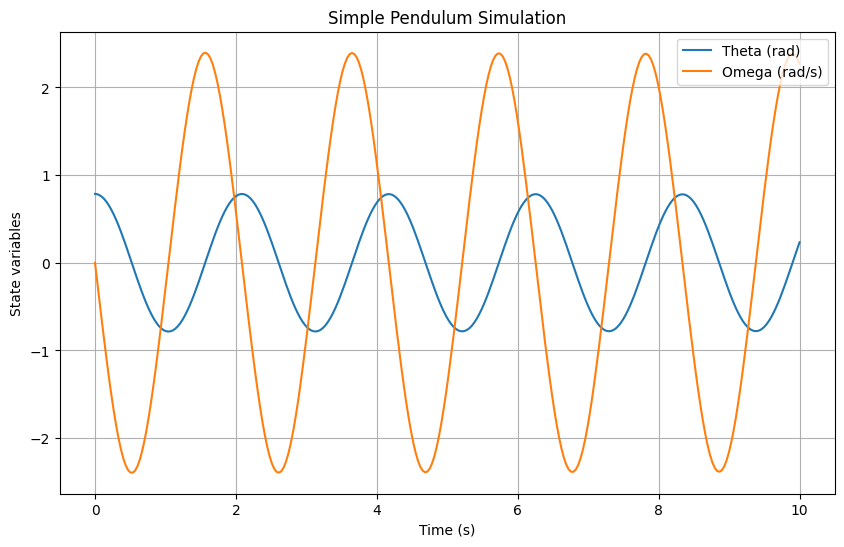

In [42]:
# Parameters for the simple pendulum
L = 1.0  # Length of the pendulum (m)
g = 9.81  # Acceleration due to gravity (m/s^2)

# Define the equations of motion
def simple_pendulum(t, y):
    theta, omega = y
    dydt = [omega, -g/L * np.sin(theta)]
    return dydt

# Initial conditions: theta0 (initial angle), omega0 (initial angular velocity)
theta0 = np.pi / 4  # 45 degrees
omega0 = 0.0
y0 = [theta0, omega0]

# Time span for the simulation
t_span = (0, 10)
t_eval = np.linspace(*t_span, 300)

# Solve the differential equation
sol = solve_ivp(simple_pendulum, t_span, y0, t_eval=t_eval)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Theta (rad)')
plt.plot(sol.t, sol.y[1], label='Omega (rad/s)')
plt.xlabel('Time (s)')
plt.ylabel('State variables')
plt.legend()
plt.title('Simple Pendulum Simulation')
plt.grid(True)
plt.show()

2. **Double Pendulum Simulation**

   A double pendulum consists of two pendulums attached end to end, resulting in more complex and chaotic motion.

   **Parameters and Equations of Motion**

   The motion of a double pendulum is governed by a set of coupled differential equations.


**Equations of Motion:** The double pendulum's motion is described by a set of coupled differential equations involving angles and angular velocities of both pendulums.

**Numerical Solution:** `scipy.integrate.solve_ivp` is used to solve these equations numerically.

**Plotting:** The angles of both pendulums are plotted over time to visualize the chaotic motion.

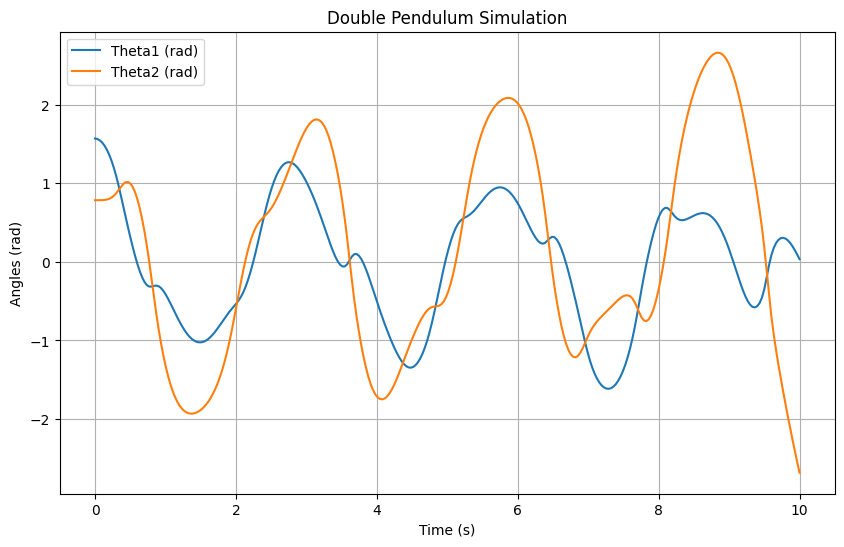

In [44]:
# Parameters for the double pendulum
L1 = 1.0  # Length of the first pendulum (m)
L2 = 1.0  # Length of the second pendulum (m)
m1 = 1.0  # Mass of the first pendulum (kg)
m2 = 1.0  # Mass of the second pendulum (kg)

# Define the equations of motion
def double_pendulum(t, y):
    theta1, z1, theta2, z2 = y
    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)
    
    theta1dot = z1
    z1dot = (m2*g*np.sin(theta2)*c - m2*s*(L1*z1**2*c + L2*z2**2) -
             (m1 + m2)*g*np.sin(theta1)) / L1 / (m1 + m2*s**2)
    theta2dot = z2
    z2dot = ((m1 + m2)*(L1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) +
             m2*L2*z2**2*s*c) / L2 / (m1 + m2*s**2)
    
    return [theta1dot, z1dot, theta2dot, z2dot]

# Initial conditions
theta1_0 = np.pi / 2  # 90 degrees
theta2_0 = np.pi / 4  # 45 degrees
z1_0 = 0.0
z2_0 = 0.0
y0 = [theta1_0, z1_0, theta2_0, z2_0]

# Time span for the simulation
t_span = (0, 10)
t_eval = np.linspace(*t_span, 300)

# Solve the differential equation
sol = solve_ivp(double_pendulum, t_span, y0, t_eval=t_eval)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Theta1 (rad)')
plt.plot(sol.t, sol.y[2], label='Theta2 (rad)')
plt.xlabel('Time (s)')
plt.ylabel('Angles (rad)')
plt.legend()
plt.title('Double Pendulum Simulation')
plt.grid(True)
plt.show()

3. **Planetary Motion Simulation**

   Simulating the motion of a planet around a star using Newton's law of gravitation.

   **Parameters and Equations of Motion**

   The planetary motion is governed by Newton's law of gravitation, resulting in differential equations for the position and velocity of the planet.

**Equations of Motion:** The planet's motion around a star is described by Newton's law of gravitation, resulting in differential equations for the position and velocity of the planet.

**Numerical Solution:** `scipy.integrate.solve_ivp` is used to solve these equations numerically.

**Plotting:** The orbit of the planet is plotted to show its trajectory in space.

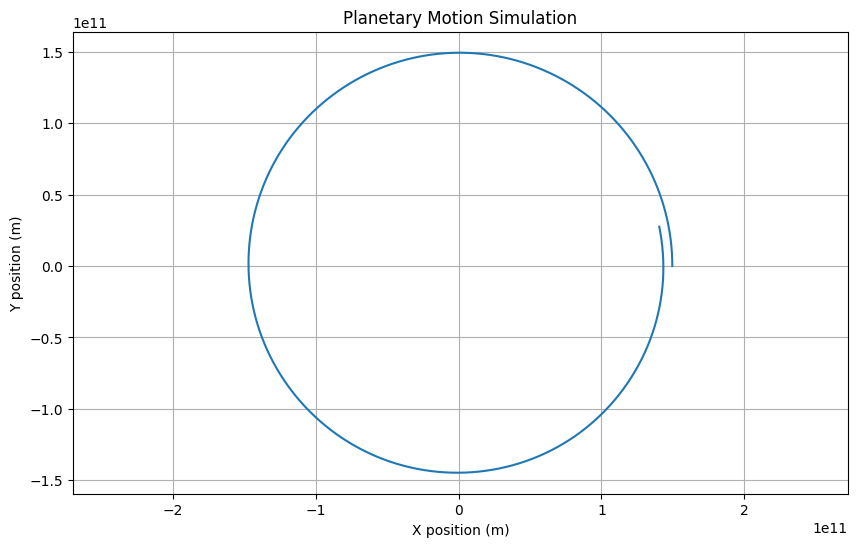

In [46]:
# Parameters for the planetary motion
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 1.989e30     # Mass of the star (kg)
m = 5.972e24     # Mass of the planet (kg)

# Define the equations of motion
def planetary_motion(t, y):
    x, y, vx, vy = y
    r = np.sqrt(x**2 + y**2)
    ax = -G * M * x / r**3
    ay = -G * M * y / r**3
    return [vx, vy, ax, ay]

# Initial conditions: position (x0, y0) and velocity (vx0, vy0)
x0 = 1.496e11  # 1 AU (m)
y0 = 0.0
vx0 = 0.0
vy0 = 29783.0  # Earth's orbital speed (m/s)
y0 = [x0, y0, vx0, vy0]

# Time span for the simulation (1 year)
T = 365.25 * 24 * 3600  # One year in seconds
t_span = (0, T)
t_eval = np.linspace(*t_span, 1000)

# Solve the differential equation
sol = solve_ivp(planetary_motion, t_span, y0, t_eval=t_eval)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.y[0], sol.y[1])
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.title('Planetary Motion Simulation')
plt.grid(True)
plt.axis('equal')
plt.show()